In [34]:
import warnings
warnings.filterwarnings('ignore')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from brian2 import prefs
prefs.codegen.target = "numpy"

from brian2 import *

# solvers in brian2


- **`exponential_euler`**: This method is a variant of the Euler method for solving ordinary differential equations (ODEs). It's specifically designed for linear ODEs and provides exact solutions when the ODE is linear.

- **`euler`**: The Euler method is a first-order numerical procedure for solving ODEs with a given initial value. It's named after Leonhard Euler who introduced it.

- **`rk2`**: The RK2 method, also known as Heun's method, is a simple, explicit method of the Runge-Kutta type for the numerical solution of ODEs.

- **`rk4`**: The RK4 method is a fourth-order method for solving ODEs. It's the most commonly used method of the Runge-Kutta family.

- **`heun`**: Heun's method is an improved version of the Euler method which is second-order accurate. It's also known as the Euler predictor-corrector method.

- **`milstein`**: The Milstein method is used for the numerical solution of stochastic differential equations (SDEs). It's a modification of the Euler–Maruyama method which includes a second-order term.



# the LIF model

In [119]:
def LIF(solver, h, t0, t1, t_sim):

    start_time = time.time()
    
    # Definisci il tempo di simulazione
    t_sim = t_sim*ms
    
    # Definisci il passo temporale
    dt = h*ms
    
    # Crea un array con i valori della corrente
    I_values = zeros(int(t_sim/dt))*nA
    t0 = t0
    t1 = t1
    I_values[int(t0*ms/dt):int((t1*ms/dt))] = 10*nA  # corrente di 1 nA 
    
    # Crea un TimedArray con i valori della corrente
    I_ext = TimedArray(I_values, dt=dt)
    
    # Parametri del modello
    C = 1*nF  # Capacità della membrana
    R_m = 10*Mohm  # Resistenza della membrana
    V_rest = -65*mV  # Potenziale di riposo
    V_reset = -80*mV
    tau_m = R_m*C  # Costante di tempo della membrana
    
    # Modello Integrate-and-Fire
    eqs = '''
    dV/dt = (-(V - V_rest) + I_ext(t)*R_m) / tau_m : volt (unless refractory)
    '''
    neuron = NeuronGroup(1, eqs, threshold='V>-50*mV', reset='V=V_reset', refractory=5*ms, method=solver)
    neuron.V = V_rest
    monitor = StateMonitor(neuron, 'V', record=True)
    net = Network(neuron, monitor)
    
    # Esecuzione della simulazione
    net.run(t_sim)
    times = monitor.t/ms
    potential = monitor.V[0]/mV


    finish_time = time.time()

    ct = finish_time - start_time
    
    return ct, times, potential


# one spike

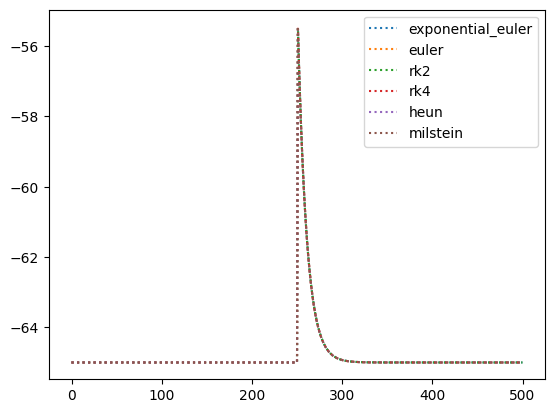

In [140]:
h = 1
k = 1
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    ct, times, potential = LIF(solver, h=h, t0=250, t1=250+k, t_sim=500)
    plt.plot(times, potential, ':', label=solver)
    plt.legend()

In [145]:
h = 1
CT = []
k = 1
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    
    for h_ in np.linspace(1e-3, 1, 10):
        ct, times, potential = LIF(solver, h=h, t0=250, t1=250+k, t_sim=500)
        CT.append([ct, solver, h_*1e-3])

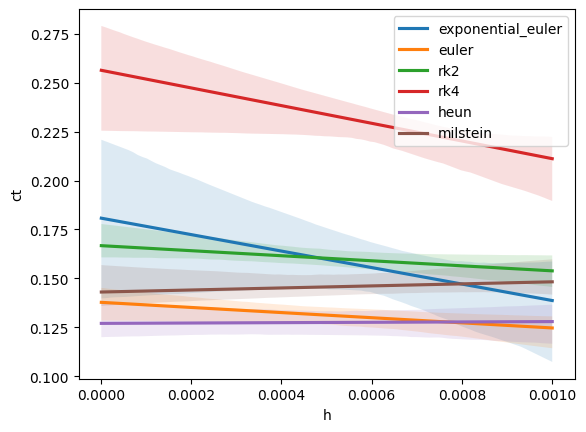

In [146]:
data=pd.DataFrame(data=CT, columns=['ct', 'solver', 'h'])
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    sns.regplot(data=data[data['solver']==solver], x='h', y='ct', order=1, label=solver, scatter=False)
plt.legend()


## two spikes

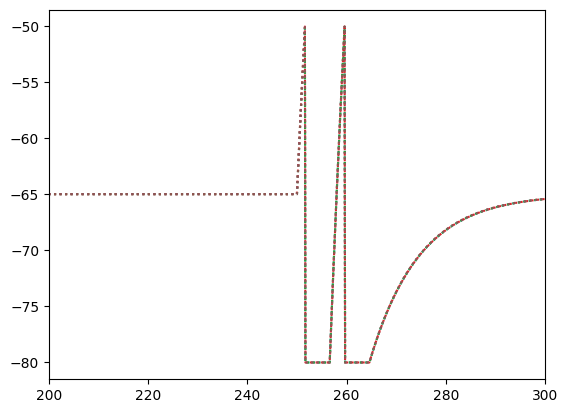

In [147]:
h = 1
k = 10
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    ct, times, potential = LIF(solver, h=h, t0=250, t1=251+k, t_sim=500)
    plt.plot(times, potential, ':')
    plt.xlim(200, 300)

## 

In [148]:
CT = []
k = 10
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    for h_ in np.linspace(1e-3, 1, 10):
        ct, times, potential = LIF(solver, h=h_, t0=250, t1=250+k, t_sim=500)
        CT.append([ct, solver, h_*1e-3])

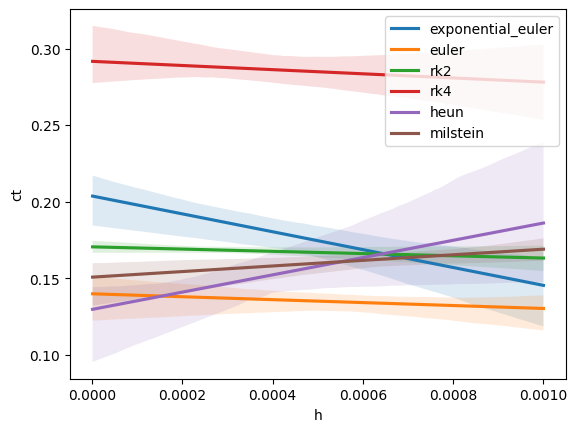

In [149]:
data=pd.DataFrame(data=CT, columns=['ct', 'solver', 'h'])

for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    sns.regplot(data=data[data['solver']==solver], x='h', y='ct', order=1, label=solver, scatter=False)
plt.legend()


# three spikes

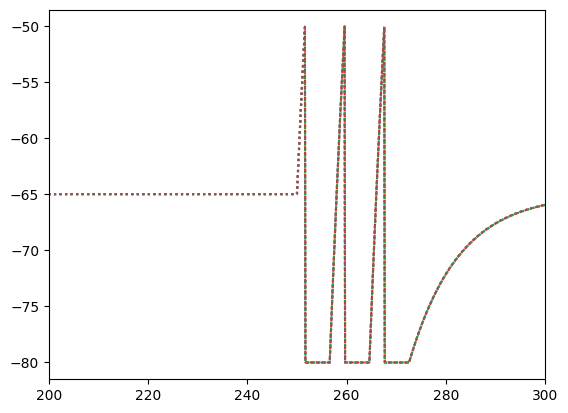

In [150]:
h = 1
k = 20
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    ct, times, potential = LIF(solver, h=h, t0=250, t1=250+k, t_sim=500)
    plt.plot(times, potential, ':')
    plt.xlim(200, 300)

In [151]:
CT = []
k = 20

for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    for h_ in np.linspace(1e-3, 1, 10):
        ct, times, potential = LIF(solver, h=h_, t0=250, t1=250+k, t_sim=500)
        CT.append([ct, solver, h_*1e-3])

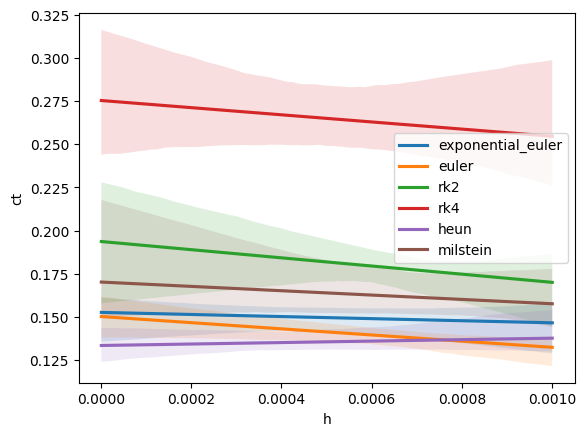

In [152]:
data=pd.DataFrame(data=CT, columns=['ct', 'solver', 'h'])
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    sns.regplot(data=data[data['solver']==solver], x='h', y='ct', order=1, label=solver, scatter=False)
plt.legend()


## n spikes

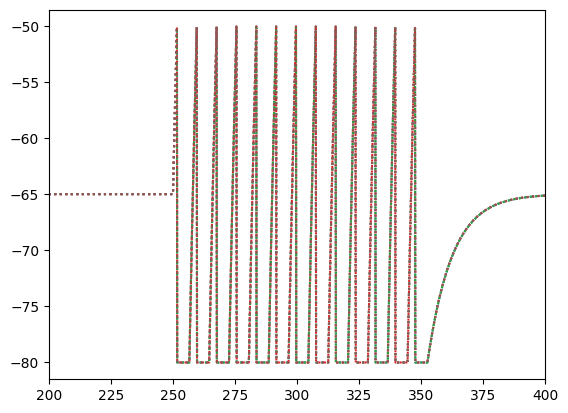

In [153]:
h = 1
k = 100
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    ct, times, potential = LIF(solver, h=h, t0=250, t1=250+k, t_sim=500)
    plt.plot(times, potential, ':')
    plt.xlim(200, 400)

In [157]:
CT = []
k = 100

for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    for h_ in np.linspace(1e-3, 1, 10):
        ct, times, potential = LIF(solver, h=h_, t0=250, t1=250+k, t_sim=500)
        CT.append([ct, solver, h_*1e-3])

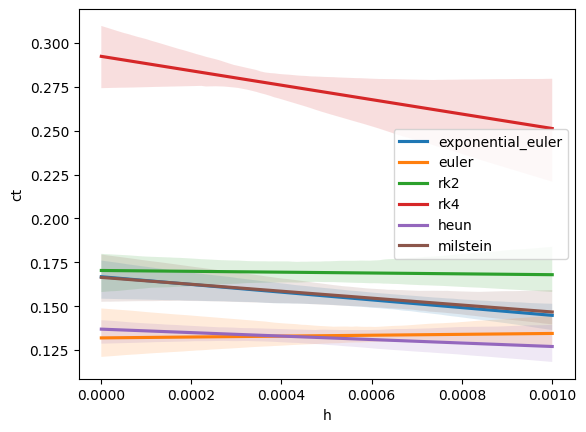

In [158]:
data=pd.DataFrame(data=CT, columns=['ct', 'solver', 'h'])
for solver in ['exponential_euler', 
                'euler', 
                'rk2', 
                'rk4', 
                'heun', 
                'milstein']:
    sns.regplot(data=data[data['solver']==solver], x='h', y='ct', order=1, label=solver, scatter=False)
plt.legend()
